In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [25]:
file_path = "Resources/alzheimers_prediction_dataset.csv"

alz_df = pd.read_csv(file_path)

alz_df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


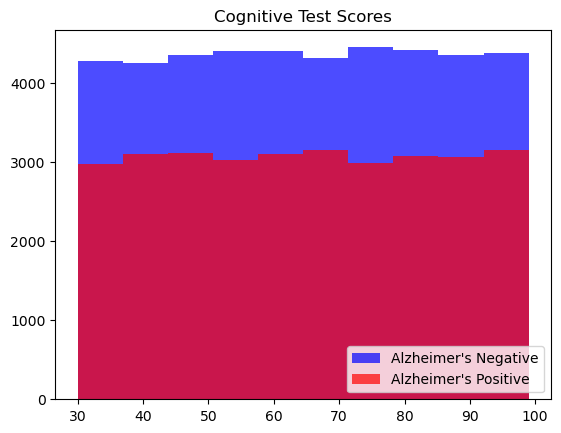

In [26]:
c_yes_alz = alz_df.loc[alz_df["Alzheimer’s Diagnosis"] == "Yes", ["Alzheimer’s Diagnosis", "Cognitive Test Score"]]
c_no_alz = alz_df.loc[alz_df["Alzheimer’s Diagnosis"] == "No", ["Alzheimer’s Diagnosis", "Cognitive Test Score"]]

plt.hist(
    c_no_alz["Cognitive Test Score"],
    color="blue",
    alpha=0.7,
    label="Alzheimer's Negative",
)
# Plot first histogram
plt.hist(
    c_yes_alz["Cognitive Test Score"],
    color="red",
    alpha=0.7,
    label="Alzheimer's Positive",
)

# Plot second histogram

plt.legend(loc="lower right")
plt.title("Cognitive Test Scores")
plt.savefig("cognitive_test.png", bbox_inches="tight", transparent=True)
plt.show()

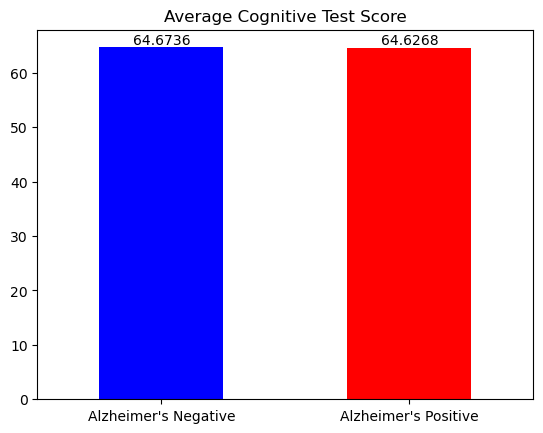

In [27]:
alz_group = alz_df.groupby("Alzheimer’s Diagnosis")

cogn_mean = alz_group["Cognitive Test Score"].mean()

ax = cogn_mean.plot.bar(color=["blue", "red"], rot=0)
ax.bar_label(ax.containers[0])

plt.xticks(
    range(len(cogn_mean.index)), ["Alzheimer's Negative", "Alzheimer's Positive"]
)
plt.xlabel("")
plt.title("Average Cognitive Test Score")
plt.savefig("cogn_mean.png", bbox_inches="tight", transparent=True)
plt.show()

In [28]:
# T-test for BMI Differences
t_stat, p_value_cogn = st.ttest_ind(
    c_yes_alz["Cognitive Test Score"], c_no_alz["Cognitive Test Score"], equal_var=False
)

# Print results
print("T-test for Cognitive Test Scores and Alzheimer's Diagnosis")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value_cogn:.2f}")

x = "has" if p_value_cogn == 0.05 else "does NOT have"
print(f"Cognitive test score {x} a significant impact on Alzheimer's diagnosis")

T-test for Cognitive Test Scores and Alzheimer's Diagnosis
T-statistic: -0.3111, P-value: 0.76
Cognitive test score does NOT have a significant impact on Alzheimer's diagnosis


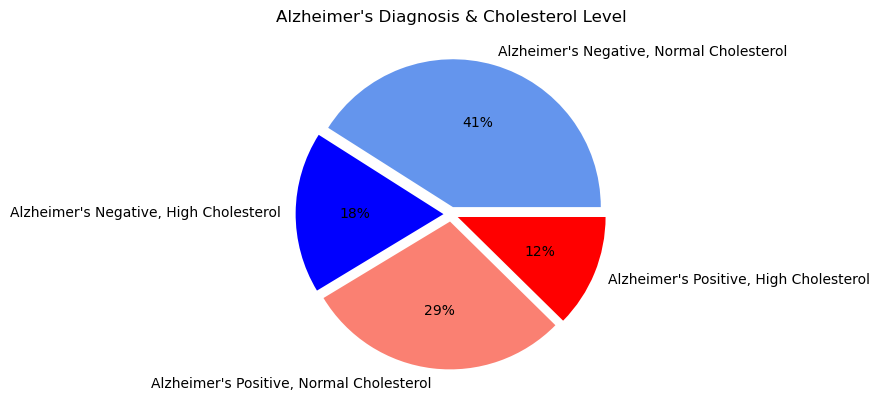

In [29]:
chol_count = alz_group["Cholesterol Level"].value_counts()

chol_labels = [
    "Alzheimer's Negative, Normal Cholesterol",
    "Alzheimer's Negative, High Cholesterol",
    "Alzheimer's Positive, Normal Cholesterol",
    "Alzheimer's Positive, High Cholesterol",
]

chol_count.plot.pie(
    autopct="%1.0f%%",
    ylabel="",
    labels=chol_labels,
    explode=(0.05, 0.05, 0.05, 0.05),
    colors=["cornflowerblue", "blue", "salmon", "red"],
    title="Alzheimer's Diagnosis & Cholesterol Level"
)
plt.savefig("cholesterol.png", bbox_inches="tight", transparent=True)
plt.show()

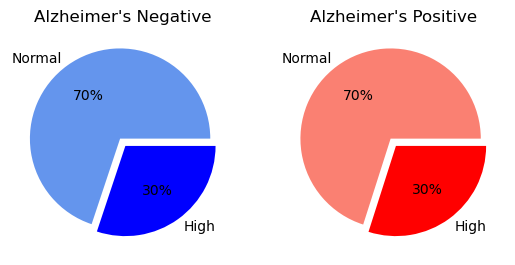

In [30]:
chol_no = chol_count.loc["No"]
chol_yes = chol_count.loc["Yes"]

plt.subplot(1, 2, 1)
chol_no.plot.pie(
    autopct="%1.0f%%",
    ylabel="",
    explode=(0.05, 0.05),
    colors=["cornflowerblue", "blue"],
    title="Alzheimer's Negative",
)
plt.subplot(1, 2, 2)
chol_yes.plot.pie(
    autopct="%1.0f%%",
    ylabel="",
    explode=(0.05, 0.05),
    colors=["salmon", "red"],
    title="Alzheimer's Positive",
)
plt.savefig("chol_pies.png", bbox_inches="tight", transparent=True)
plt.show()

In [31]:
# Chi-square test for Dietary Habits
cholesterol_contingency_table = pd.crosstab(
    alz_df["Cholesterol Level"], alz_df["Alzheimer’s Diagnosis"]
)
chi2, p_value_chol, dof, expected = st.chi2_contingency(cholesterol_contingency_table)

# Print Results
print("Chi-square test for Cholesterol Level and Alzheimer's Diagnosis")
print(
    f"Chi-square statistic: {chi2}, P-value: {p_value_chol:.2f}, Degrees of Freedom: {dof}"
)

x = "has" if p_value_chol == 0.05 else "does NOT have"
print(f"Cholesterol Level {x} a significant impact on Alzheimer's diagnosis")

Chi-square test for Cholesterol Level and Alzheimer's Diagnosis
Chi-square statistic: 0.3195112054318619, P-value: 0.57, Degrees of Freedom: 1
Cholesterol Level does NOT have a significant impact on Alzheimer's diagnosis
